Name : Janhavi Sachin Phulavare

Task 1 : Stock Prediction  using LSTM

Here, using Long Short Term Memory Network (LSTM) for building your model to predict the Stock Prices of Tesla.

https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("TSLA.csv",parse_dates=True,index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [4]:
df.shape

(1258, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-08-16 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Text(0.5, 1.0, 'Tesla Closing Price Over Years')

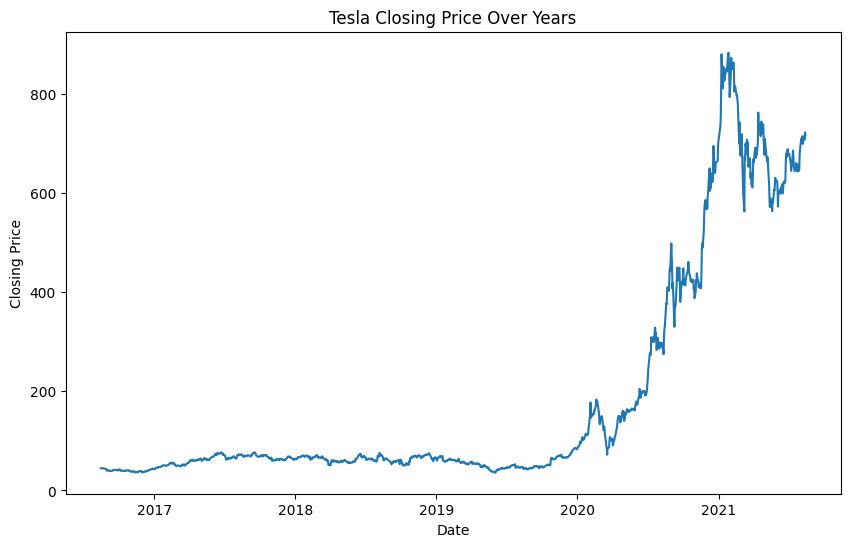

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Closing Price Over Years')

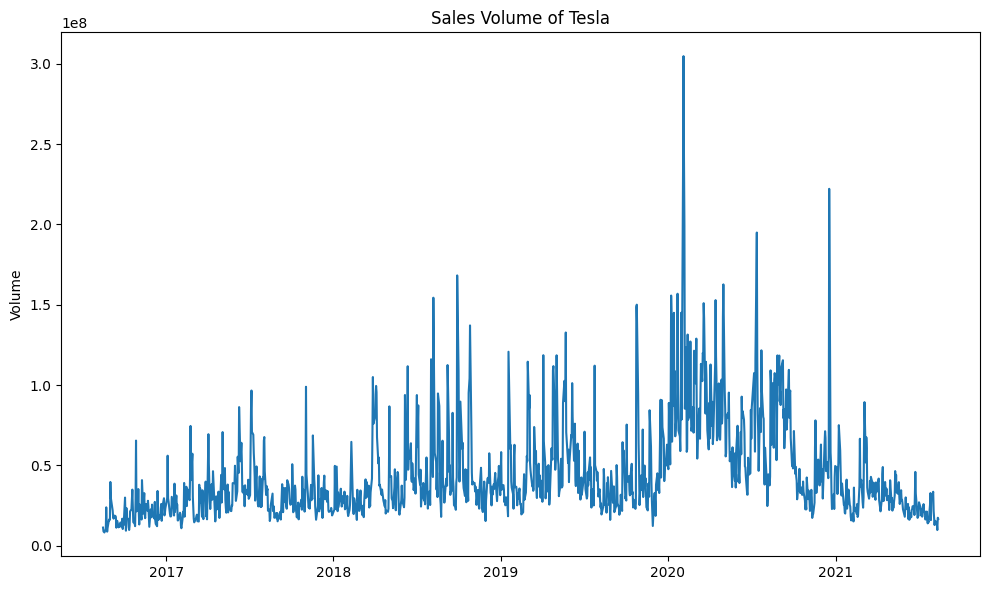

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Volume'])
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()

Data Preprocessing :



Using Open Column for Training :

In [10]:
dataset = df["Open"]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(1258, 1)

Normalizing the data :

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

Spliting Data into Train and Test data :

In [12]:
# 75% : Train 25% : Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 943 Test Size : 315


In [13]:
train_data.shape,test_data.shape

((943, 1), (375, 1))

Train set :

In [14]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

Converting to Numpy array :

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

Reshaping the Data :

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building the LSTM model :

In [17]:
model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))


Fitting the Model :

In [18]:
model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
28/28 [==============================] - 7s 59ms/step - loss: 4.8579e-04 - mean_absolute_error: 0.0138
Epoch 2/100
28/28 [==============================] - 2s 59ms/step - loss: 1.0742e-04 - mean_absolute_error: 0.0063
Epoch 3/100
28/28 [==============================] - 2s 60ms/step - loss: 8.5706e-05 - mean_absolute_error: 0.0056
Epoch 4/100
28/28 [==============================] - 2s 62ms/step - loss: 6.6315e-05 - mean_absolute_error: 0.0047
Epoch 5/100
28/28 [==============================] - 2s 60ms/step - loss: 6.1170e-05 - mean_absolute_error: 0.0048
Epoch 6/100
28/28 [==============================] - 2s 67ms/step - loss: 6.1573e-05 - mean_absolute_error: 0.0051
Epoch 7/100
28/28 [==============================] - 3s 90ms/step - loss: 7.2384e-05 - mean_absolute_error: 0.0055
Epoch 8/100
28/28 [==============================] - 2s 59ms/step - loss: 5.6050e-05 - mean_absolute_error: 0.0047
Epoch 9/100
28/28 [==============================] - 2s 61ms/step - loss: 4.9339

Test set :

In [23]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [24]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

Predicting the values :

In [26]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 25ms/step


(315, 1)

Visualizing the Predictions :

In [27]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

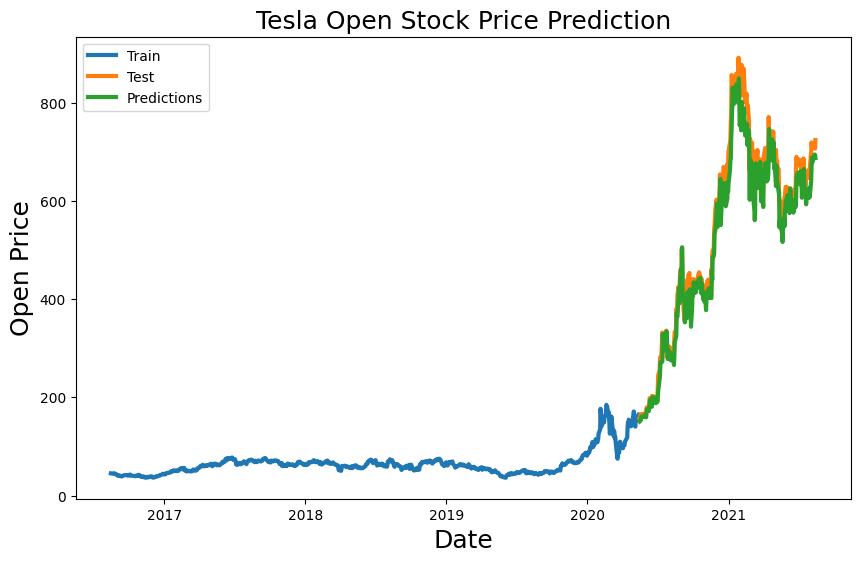

In [28]:
plt.figure(figsize=(10,6))
plt.title('Tesla Open Stock Price Prediction' , fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3)
plt.plot(test['Open'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])